## Apartment price prediction
#### The objective of this notebook is to explore techiniques for **visualization, exploration and cleaning** of a real-world dataset, that will be used to **train** a Random Forest algorithm in order to make **predictions** on the price of a property.

#### It is based on the Properati Dataset, which gathers real state information from [Properati site](https://www.properati.com.ar/) 

### Library Loading

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import geopandas

import logging
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


### Data Loading

In [ ]:
# Dataset can be downloaded from: https://www.kaggle.com/datasets/alejandroczernikier/properati-argentina-dataset
import warnings
warnings.filterwarnings("ignore")

#Load dataset
df=pd.read_csv(r"D:\Documentos\portfolio\entrenamiento.csv").convert_dtypes()
df.set_index("id", inplace= True)
#Read first row
df.head()

,lat,lon,country,city,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,
556713,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,3,2,2,<NA>,<NA>,USD,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
192912,-58.430493,-34.60662,Argentina,Capital Federal,Almagro,3,2,2,77,67,USD,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
238224,-58.49176,-34.574123,Argentina,Capital Federal,Villa Urquiza,2,<NA>,1,60,55,USD,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
257134,-58.420737,-34.63177,Argentina,Capital Federal,Boedo,2,1,1,74,47,USD,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
521738,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,3,2,1,66,64,USD,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0


In [214]:
#Examine columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992192 entries, 556713 to 1000000
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              838994 non-null  Float64
 1   lon              839929 non-null  Float64
 2   country          992192 non-null  string 
 3   city             992192 non-null  string 
 4   neighborhood     934737 non-null  string 
 5   rooms            503045 non-null  Int64  
 6   bedrooms         390699 non-null  Int64  
 7   bathrooms        773021 non-null  Int64  
 8   surface_total    448164 non-null  Int64  
 9   surface_covered  436961 non-null  Int64  
 10  currency         944941 non-null  string 
 11  title            992164 non-null  string 
 12  description      992170 non-null  string 
 13  property_type    992192 non-null  string 
 14  operation_type   992192 non-null  string 
 15  price            947811 non-null  Float64
dtypes: Float64(3), Int64(5), string(8)
me

In [215]:
df.shape

(992192, 16)

In [216]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,838994.0,839929.0,503045.0,390699.0,773021.0,448164.0,436961.0,947811.0
mean,-59.266586,-34.793745,2.858577,2.086094,1.697637,493.51136,576.953341,288168.736682
std,2.707383,3.066257,1.682454,2.705342,1.072722,4101.38179,73839.980806,5560862.702558
min,-180.0,-54.842464,1.0,-13.0,1.0,-200.0,-170.0,0.0
25%,-58.756011,-34.921709,2.0,1.0,1.0,50.0,45.0,39000.0
50%,-58.444383,-34.610508,3.0,2.0,1.0,95.0,75.0,98000.0
75%,-58.058983,-34.459156,4.0,3.0,2.0,270.0,155.0,210000.0
max,-35.045025,85.051129,40.0,900.0,20.0,200000.0,27000000.0,3100000000.0


### Understanding and filtering the data

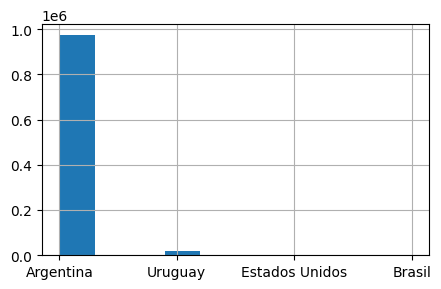

In [395]:
#Which countrys are representated in the dataset?
df["country"].hist(figsize=(5,3))

#We are only interested in Argentina
df=df[df["country"]=="Argentina"]


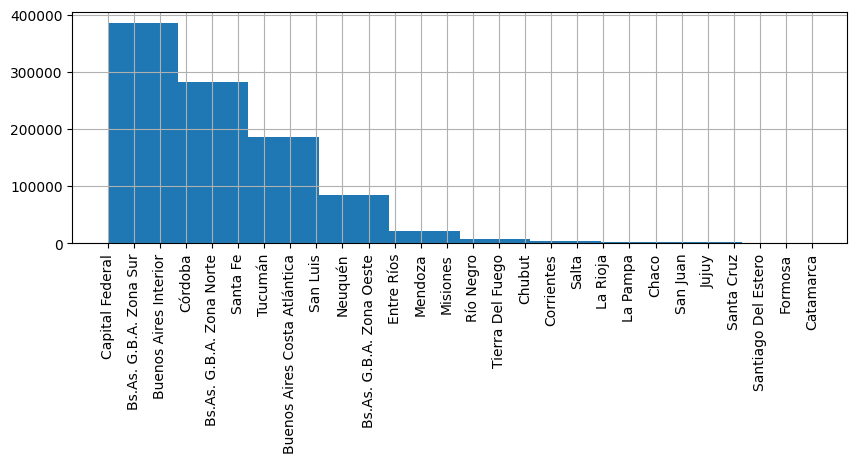

In [396]:
#¿Which cities of Argentina are represented in the dataset?
df["city"].hist(figsize=(10,3), xrot=90)

#We are only interested in Capital Federal
df=df[df["city"]=="Capital Federal"]

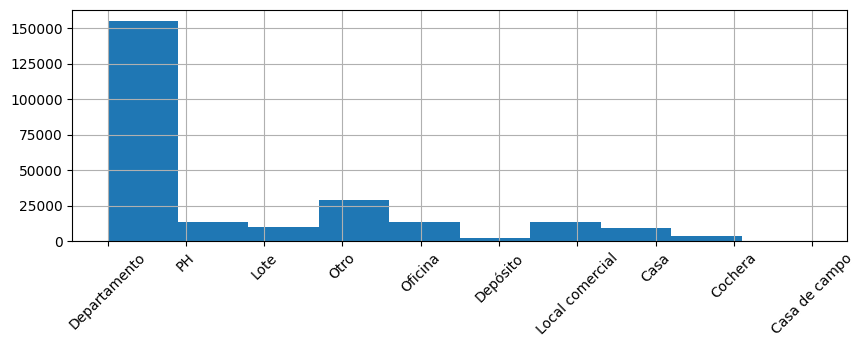

In [397]:
#What kind of properties are in Capital Federal?
df["property_type"].hist(figsize=(10,3), xrot=45)

#We are only interested in Apartments ("Departamento")
df=df[df["property_type"]=="Departamento"]

In [398]:
#What kind of operation types are published?
print(df["operation_type"].value_counts())

#What types of currencies are published?
print(df["currency"].value_counts())

#We are only interesented in sell operations ("Venta") in USD
df=df[(df["operation_type"]=="Venta") & (df["currency"]=="USD")]

operation_type
Venta                105377
Alquiler              36825
Alquiler temporal     13085
Name: count, dtype: Int64
currency
USD    108109
ARS     42495
Name: count, dtype: Int64


In [221]:
df.shape

(100232, 16)

In [399]:
#Knowing that these properties are from Argentina, we can see that there is something strange with latitude and longitude: 
print(df[["lat", "lon"]].head(3))
# They are switched. Capital Federal´s correct LATITUDE is around -34.5

#We switch the labels to the correct order
df=df.rename(columns={"lat":"lon", "lon":"lat"})

              lat        lon
id                          
556713 -58.442399 -34.573623
192912 -58.430493  -34.60662
238224  -58.49176 -34.574123


### Data Filtering and NaN imputation

In [400]:
#Looking at min and max values of latitude and longitude we can see that this data is excessively scattered.
df[["lat", "lon"]].describe()
#Remember that Capital Federal´s correct LATITUDE is around -34.5


,lat,lon
count,91541.0,91485.0
mean,-34.57699,-58.473705
std,0.329418,0.464062
min,-53.788249,-71.356235
25%,-34.611902,-58.456793
50%,-34.597704,-58.43413
75%,-34.579807,-58.411583
max,1.0,-55.893563


In [401]:
#  We are going to filter the data to obtain only the properties that are inside the limits of "Capital Federal" City
df=df[(df["lon"]>-59) & (df["lon"]< -58) & (df["lat"]< -34.5) & (df["lat"]> -34.7)]

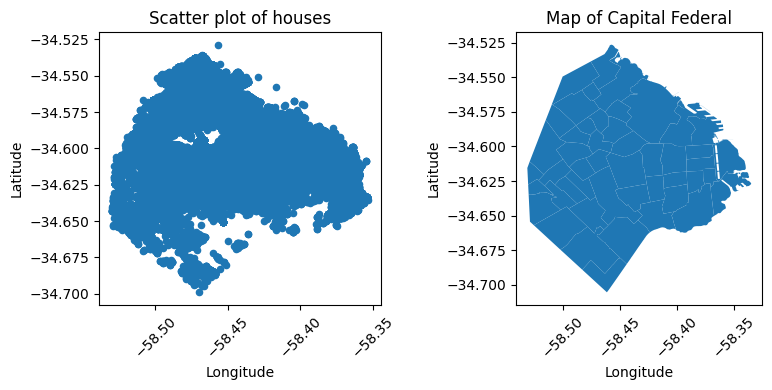

In [402]:
#Properties form the shape of the city, as we can see when we compare it with a geopandas map

#Load map of "Capital Federal"
gdf_barrios = geopandas.read_file("barrios.geojson.txt")

#Comparation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

#Scatter of properties on ax1
df.plot.scatter("lon", "lat", ax=ax1)
ax1.set_title("Scatter plot of houses")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.tick_params(axis="x", rotation=45)

#Geopandas on ax2
gdf_barrios.plot(ax=ax2)
ax2.set_title("Map of Capital Federal")
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.tick_params(axis="x", rotation=45)

fig.tight_layout()
plt.show()

### Nan imputation

NaN values are common in real-life datasets and several machine learning algorithms don´t support them

A simple approach would be to drop all the rows with NaN values.

However, that would imply the lost of information, and taking into account that predictive models work better when they are trained with large amount of data it´s crucial to find ways to impute the missing information

In [403]:
# First lets build a simple function to count NaN values across columns so we can keep track of them
def nulos(df):
      NaN_list=[]
      Not_Nan_list=[]

      for c in df.columns:
            NaN_list.append(df[c].isna().sum())
            Not_Nan_list.append(df[c].notna().sum())

      NaN_df=pd.DataFrame(
      {"Nan":NaN_list,
      "Not NaN": Not_Nan_list},
      index=df.columns 
      )

      return NaN_df

nulos(df) #There are several NaN values in different columns

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,4954,85474
bedrooms,28436,61992
bathrooms,4141,86287
surface_total,18391,72037
surface_covered,17356,73072


#### Surface imputation

We can think in 3 conditions:
1. Its not an imputation problem, but a correction on wrong data.
If surface_total < surface_covered, it means that the data has been wrongly loaded, so we switch the values 

2. If surface_covered is NaN but surface_total is not, we can use the information of the latter to imput the former.

3. And we can have a similar approach if surface_total is NaN but surface_covered is not

In [404]:
def impute_surface(df):
    df = df.copy()

    # Condition 1: surface_total < surface_covered → Swap
    mask_swap = (df["surface_total"] < df["surface_covered"])
    df.loc[mask_swap, ["surface_total", "surface_covered"]] = df.loc[mask_swap, ["surface_covered", "surface_total"]].values

    # Condición 2: surface_covered is NaN but surface_total is not
    mask_cov_na = df["surface_covered"].isna() & df["surface_total"].notna()
    df.loc[mask_cov_na, "surface_covered"] = df.loc[mask_cov_na, "surface_total"]

    # Condición 3: surface_total is NaN but surface_covered is not
    mask_tot_na = df["surface_total"].isna() & df["surface_covered"].notna()
    df.loc[mask_tot_na, "surface_total"] = df.loc[mask_tot_na, "surface_covered"]

    return df

In [405]:
df=impute_surface(df)

### Imputation from title and description columns with regular expressions

In [406]:
def impute_surface2(df):
    df=df.copy()

    """
    Extracts surface area information (m2) from the title and description
    for rows with missing surface_total or surface_covered,
    and uses it to impute missing values.
    """

    # Regex pattern to extract surface values like "50 m2", "50m²", "50 metros cuadrados"
    pattern = r"(?i)(\d{1,4})\s*(m2|m²|metros|metros cuadrados)"

    # Mask rows where we need to impute
    mask = df['surface_total'].isna() | df['surface_covered'].isna()

    # Apply regex only to filtered rows
    df.loc[mask, 'surface_title'] = df.loc[mask, 'title'].str.extract(pattern)[0]
    df.loc[mask, 'surface_description'] = df.loc[mask, 'description'].str.extract(pattern)[0]

    # Combine extracted values
    df['surface_extracted'] = df['surface_title'].fillna(df['surface_description'])
    df['surface_extracted'] = pd.to_numeric(df['surface_extracted'], errors='coerce')

    # Count how many we'll impute
    count_total = df['surface_total'].isna().sum()
    count_covered = df['surface_covered'].isna().sum()

    # Impute missing values
    df['surface_total'] = df['surface_total'].fillna(df['surface_extracted'])
    df['surface_covered'] = df['surface_covered'].fillna(df['surface_extracted'])

    # Final count of actual imputations (after fillna)
    imputed_total = count_total - df['surface_total'].isna().sum()
    imputed_covered = count_covered - df['surface_covered'].isna().sum()

    print(f"Imputed {imputed_total} values in 'surface_total' and {imputed_covered} in 'surface_covered' using extracted text.")

    # Drop intermediate columns
    df.drop(['surface_title', 'surface_description', 'surface_extracted'], axis=1, inplace=True)

    return df


In [407]:
df=impute_surface2(df)

Imputed 4198 values in 'surface_total' and 4198 in 'surface_covered' using extracted text.


In [408]:
def impute_rooms(df):
    df = df.copy()
    
    # Regular expression for differente number of rooms ("ambiente")
    pattern1 = r"(?i)(\d+|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|mono)\s*-?\s*amb(?:iente)?s?"
    
    # Word-number mapping
    number_map = {
        "un": "1", "uno": "1", "dos": "2", "tres": "3", "cuatro": "4", "cinco": "5",
        "seis": "6", "siete": "7", "ocho": "8", "nueve": "9", "diez": "10"
    }
    
    # Look for NaN in rooms
    mask = df['rooms'].isna()
    count_before = mask.sum()
    
    # Get number of rooms from title and description
    df.loc[mask, "ambientes_title"] = df.loc[mask, "title"].str.extract(pattern1, expand=False)
    df.loc[mask, "ambientes_description"] = df.loc[mask, "description"].str.extract(pattern1, expand=False)
    
    # Replace "mono" for 1
    df.loc[mask, "ambientes_title"] = df.loc[mask, "ambientes_title"].str.lower().replace("mono", "1")
    df.loc[mask, "ambientes_description"] = df.loc[mask, "ambientes_description"].str.lower().replace("mono", "1")
    
    # Change numbers in words to digits
    df.loc[mask, "ambientes_title"] = df.loc[mask, "ambientes_title"].str.lower().replace(number_map)
    df.loc[mask, "ambientes_description"] = df.loc[mask, "ambientes_description"].str.lower().replace(number_map)
    
    # Fill new columns
    df['rooms_2'] = df['rooms'].fillna(df['ambientes_title']).fillna(df['ambientes_description'])
    
    # Clean new columns
    df['rooms_2'] = pd.to_numeric(df['rooms_2'], errors='coerce')

    # Reeplace new values
    df['rooms'] = df['rooms_2']

    # Count of imputated values
    count_after = df['rooms'].isna().sum()
    imputed_count = count_before - count_after

    # Drop intermediate columns
    df = df.drop(["ambientes_title", "ambientes_description", "rooms_2"], axis=1)
        
    print(f"{imputed_count} 'rooms' values were imputed")
    return df
    


In [409]:
df=impute_rooms(df)

4270 'rooms' values were imputed


In [410]:
nulos(df)

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,684,89744
bedrooms,28436,61992
bathrooms,4141,86287
surface_total,11516,78912
surface_covered,11516,78912


In [411]:
# Since there are still some NaN we are gonna imputed based on the surface covered

def impute_rooms2(df):
    """
    Imputes the number of rooms based on the covered surface area
    when this information cannot be extracted from text.

    Assumes typical apartment room sizes:
    - <= 36 m2 → 1 room
    - 36–50 m2 → 2 rooms
    - 51–72 m2 → 3 rooms
    - > 72 m2 → 4 rooms

    Also prints the number of imputations made for each range.
    """

    df = df.copy()  # Avoid modifying the original DataFrame

    # Define masks for each surface range where 'rooms' is NaN
    mask1 = df['rooms'].isna() & (df['surface_covered'] <= 36)
    mask2 = df['rooms'].isna() & (df['surface_covered'] > 36) & (df['surface_covered'] <= 50)
    mask3 = df['rooms'].isna() & (df['surface_covered'] > 50) & (df['surface_covered'] <= 72)
    mask4 = df['rooms'].isna() & (df['surface_covered'] > 72)

    # Assign room values based on surface ranges
    df.loc[mask1, 'rooms'] = 1
    df.loc[mask2, 'rooms'] = 2
    df.loc[mask3, 'rooms'] = 3
    df.loc[mask4, 'rooms'] = 4

    # Log how many imputations were done per range
    print("Rooms imputed based on covered surface:")
    print(f"  • 1 room (<= 36 m2): {mask1.sum()}")
    print(f"  • 2 rooms (36–50 m2): {mask2.sum()}")
    print(f"  • 3 rooms (51–72 m2): {mask3.sum()}")
    print(f"  • 4 rooms (> 72 m2): {mask4.sum()}")

    return df


In [412]:
df=impute_rooms2(df)

Rooms imputed based on covered surface:
  • 1 room (<= 36 m2): 188
  • 2 rooms (36–50 m2): 64
  • 3 rooms (51–72 m2): 44
  • 4 rooms (> 72 m2): 158


In [413]:
nulos(df)

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,230,90198
bedrooms,28436,61992
bathrooms,4141,86287
surface_total,11516,78912
surface_covered,11516,78912


#### We imputed more than 95% of original NaN values. Not bad! Lets do similar with the rest of the features

In [414]:
def impute_bedrooms(df):
    # Regex patterns to extract bedroom mentions from text
    pattern1 = r"(?i)(\d+|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*dorm"
    pattern2 = r"(?i)(\d+|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*habitacion"
    pattern3 = r"(?i)(\d+|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*cuarto"

    # Extract possible bedroom numbers from title and description
    df["dormitorios_title"] = df["title"].str.extract(pattern1, expand=False)
    df["dormitorios_description"] = df["description"].str.extract(pattern1, expand=False)
    df["habitacion_title"] = df["title"].str.extract(pattern2, expand=False)
    df["habitacion_description"] = df["description"].str.extract(pattern2, expand=False)
    df["cuarto_title"] = df["title"].str.extract(pattern3, expand=False)
    df["cuarto_description"] = df["description"].str.extract(pattern3, expand=False)

    # Map written numbers to digits
    number_map = {
        "un": "1", "uno": "1", "dos": "2", "tres": "3", "cuatro": "4", "cinco": "5",
        "seis": "6", "siete": "7", "ocho": "8", "nueve": "9", "diez": "10"
    }

    for col in [
        "dormitorios_title", "dormitorios_description",
        "habitacion_title", "habitacion_description",
        "cuarto_title", "cuarto_description"
    ]:
        df[col] = df[col].str.lower().replace(number_map)

    # Impute bedrooms: use extracted features and then fallback to 'rooms'
    fill_order = [
        "bedrooms", "dormitorios_title", "dormitorios_description",
        "cuarto_title", "cuarto_description",
        "habitacion_title", "habitacion_description",
        "rooms"
    ]

    # Save the initial number of NaNs
    n_initial_na = df["bedrooms"].isna().sum()

    # Impute using backfill across selected columns
    df["bedrooms"] = df[fill_order].bfill(axis=1).iloc[:, 0]
    df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors="coerce")

    # Calculate how many were imputed
    n_final_na = df["bedrooms"].isna().sum()
    n_imputed = n_initial_na - n_final_na
    logging.info(f"Imputed {n_imputed} missing values in 'bedrooms'")

    # Drop intermediate columns
    df = df.drop([
        "dormitorios_title", "dormitorios_description",
        "habitacion_title", "habitacion_description",
        "cuarto_title", "cuarto_description"
    ], axis=1)

    return df



In [415]:
warnings.filterwarnings("ignore")
df=impute_bedrooms(df)

In [416]:
nulos(df)

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,230,90198
bedrooms,133,90295
bathrooms,4141,86287
surface_total,11516,78912
surface_covered,11516,78912


In [417]:
def impute_bedrooms2(df):
    # Create a mask where 'bedrooms' is NaN and 'rooms' is not NaN
    mask = df["bedrooms"].isna() & df["rooms"].notna()
    
    # Count how many values will be imputed
    imputed_count = mask.sum()
    
    # Perform the imputation
    df.loc[mask, "bedrooms"] = df.loc[mask, "rooms"] - 1
    
    # Show the result
    print(f"Imputed {imputed_count} values of 'bedrooms' from 'rooms - 1'.")

    return df


In [418]:
nulos(df)

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,230,90198
bedrooms,133,90295
bathrooms,4141,86287
surface_total,11516,78912
surface_covered,11516,78912


In [419]:
def impute_bathrooms(df):
    df = df.copy()  # Avoid modifying the original DataFrame
    
    # Regex patterns to extract bedroom mentions from text
    pattern1 = r"(?i)(\d+|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*baño"

    # Look for NaN in bathrooms
    mask = df['bathrooms'].isna()
    count_before = mask.sum()

    # Extract possible bathroom numbers from title and description
    df.loc[mask, "baños_title"] = df.loc[mask, "title"].str.extract(pattern1, expand=False)
    df.loc[mask, "baños_description"] = df.loc[mask, "description"].str.extract(pattern1, expand=False)

    # Map written numbers to digits
    number_map = {
        "un": "1", "uno": "1", "dos": "2", "tres": "3", "cuatro": "4", "cinco": "5",
        "seis": "6", "siete": "7", "ocho": "8", "nueve": "9", "diez": "10"
    }

    # Change numbers in words to digits
    df.loc[mask, "baños_title"] = df.loc[mask, "baños_title"].str.lower().replace(number_map)
    df.loc[mask, "baños_description"] = df.loc[mask, "baños_description"].str.lower().replace(number_map)
    
    # Fill new columns
    df['baños_2'] = df['bathrooms'].fillna(df['baños_title']).fillna(df['baños_description'])
    
    # Clean new columns
    df['baños_2'] = pd.to_numeric(df['baños_2'], errors='coerce')

    # Reeplace new values
    df['bathrooms'] = df['baños_2']

    # Count of imputated values
    count_after = df['bathrooms'].isna().sum()
    imputed_count = count_before - count_after

    # Drop intermediate columns
    df = df.drop(["baños_title", "baños_description", "baños_2"], axis=1)
        
    print(f"{imputed_count} 'baños' values were imputed")
    return df
    


In [420]:
df=impute_bathrooms(df)

491 'baños' values were imputed


In [421]:
nulos(df)

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,230,90198
bedrooms,133,90295
bathrooms,3650,86778
surface_total,11516,78912
surface_covered,11516,78912


### Let´s see how our data looks after these imputations

#### We´ll start with bathrooms, rooms and bedrooms distribution

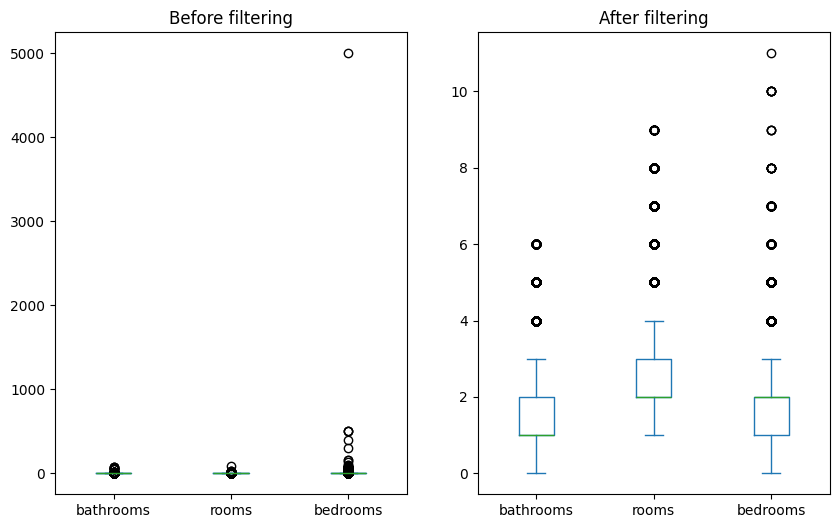

In [422]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))

df[["bathrooms", "rooms", "bedrooms"]].plot(kind="box", ax=ax1)
ax1.set_title("Before filtering")

#We can clearly see that there are a lot of outliers. Since we are working with Apartments, let´s filter the data based on a logical values for these features
df=df[(df["bathrooms"]<7) & (df["rooms"]<10) & (df["bedrooms"]<15)]

#After filtering
df[["bathrooms", "rooms", "bedrooms"]].plot(kind="box", ax=ax2)
ax2.set_title("After filtering")

plt.show()

### Let´s see how does the surface and price values distribute

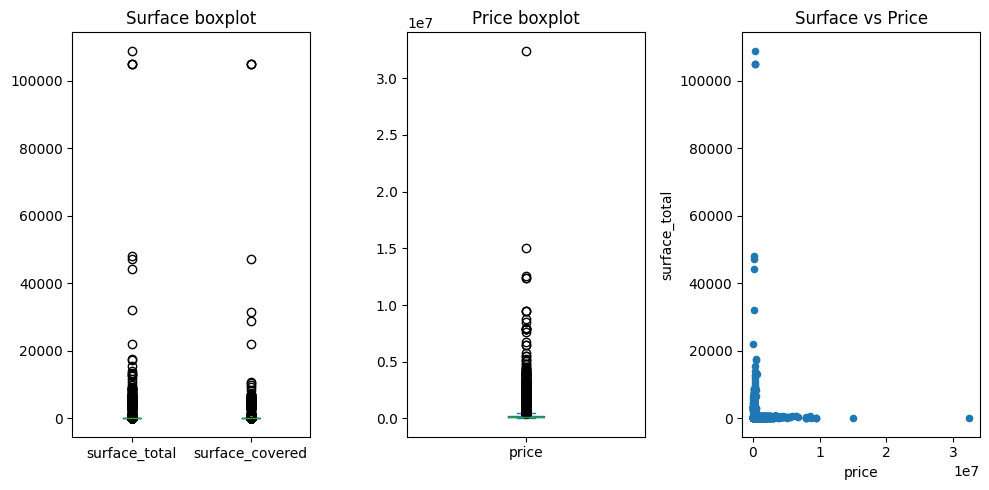

In [423]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))

df[["surface_total", "surface_covered"]].plot(kind="box", ax=ax1)
ax1.set_title("Surface boxplot")

df["price"].plot(kind="box", ax=ax2)
ax2.set_title("Price boxplot")

df.plot.scatter("price", "surface_total", ax=ax3)
ax3.set_title("Surface vs Price")

fig.tight_layout()
plt.show()


#### There are many outliers on surface and price, and several properties with high price but low surface
This is causing a strage behaviour in the surface vs price scatter plot, as one would expect a linear relationship.

We´ll suppose a mean value of 75 m2 for a property of 4 rooms...so properties with values much bigger than that should be rare...lets investigate it 


In [424]:
#Let´s catch properties that are oddly large in surface?
high_surface= df[df["surface_total"]>1000]
high_surface["title"]

id
139033      Venta Almagro Departamento 3 ambientes luminoso
112503    3 ambientes con Balcon, luminoso excelente estado
112506      3 ambientes contrafrente con balcon y cochera!!
626590          TRES AMBIENTES EN EL COMPLEJO CATALINA SUR.
652277    1247m2 Totales      ( Cubiertos 94 m2 - Descub...
                                ...                        
942720    VENTA 4 AMBIENTES C/DEPEN-BARRIO NORTE OPORTUN...
946404    VENTA DEPARTAMENTO 3 AMBIENTES CABALLITO/PARQU...
963983                  DEPARTAMENTO DOS AMBIENTES CABALITO
977601    Luminoso Dpto con Cochera!!! excelente ubicaci...
994027                             Monoambiente en Congreso
Name: title, Length: 138, dtype: string

In [425]:
#How many rooms do the have in average?
print(high_surface["rooms"].mean())
print(high_surface["bedrooms"].mean())

2.210144927536232
1.5724637681159421


The mean romm value for these rare properties is 2. So it reasonable to think that the surface values are incorrect.
We gonna imput them with our previous arbitrary classification where:

1 room → 36 m2 

2 rooms → 40 m2

3 rooms → 55 m2

4 rooms → 75 m2


In [426]:
mask_high_surface=((df["surface_covered"] > 1000) | (df["surface_total"] > 1000))
mask_1room= df["rooms"]==1
mask_2rooms= df["rooms"]==2
mask_3rooms= df["rooms"]==3
mask_4rooms= df["rooms"]>=4

df.loc[(mask_high_surface & mask_1room), ["surface_total", "surface_covered"]] = [36, 36]
df.loc[(mask_high_surface & mask_2rooms), ["surface_total", "surface_covered"]] = [40, 40]
df.loc[(mask_high_surface & mask_3rooms), ["surface_total", "surface_covered"]] = [55, 55]
df.loc[(mask_high_surface & mask_4rooms), ["surface_total", "surface_covered"]] = [75, 75]


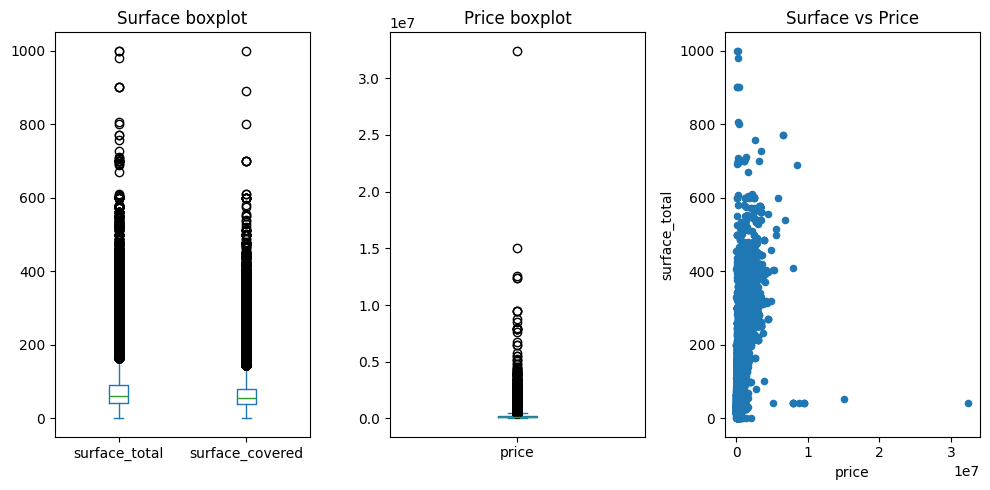

In [427]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))

df[["surface_total", "surface_covered"]].plot(kind="box", ax=ax1)
ax1.set_title("Surface boxplot")

df["price"].plot(kind="box", ax=ax2)
ax2.set_title("Price boxplot")

df.plot.scatter("price", "surface_total", ax=ax3)
ax3.set_title("Surface vs Price")

fig.tight_layout()
plt.show()


#### Getting better. Now let´s investigate properties with extreme high prices

In [428]:
high_price=df[df["price"]>5000000]
high_price.describe()


,lon,lat,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,25.0,25.0,25.0,25.000000,25.0,21.0,21.0,25.0
mean,-58.426849,-34.593134,3.08,2.440000,2.44,289.047619,257.428571,9183204.44
std,0.030143,0.020648,2.039608,1.386843,1.709776,282.181941,242.44042,5496453.608387
min,-58.464222,-34.616931,1.0,1.000000,1.0,41.0,37.0,5100000.0
25%,-58.446543,-34.606544,1.0,1.000000,1.0,41.0,37.0,6500000.0
50%,-58.440101,-34.606544,3.0,3.000000,1.0,52.0,48.0,7897000.0
75%,-58.415855,-34.576518,5.0,4.000000,4.0,516.0,500.0,9477000.0
max,-58.361275,-34.548967,8.0,5.000000,6.0,771.0,611.0,32434232.0


In [429]:
high_price["neighborhood"].unique()

<StringArray>
[      'Palermo',     'Caballito',      'Belgrano', 'Villa Ortuzar',
 'Puerto Madero',      'Recoleta',  'Villa Crespo']
Length: 7, dtype: string

### They seem like normal properties (not too big, not in very expensive neighorhoods).
So the price MUST be a mistake. However since price is our target variable and we dont have a safe to imput it, we are going to drops these properties.

There are still some properties with extreme surface values and low prices, so we are also going to drop them

In [430]:
mask_st=  (df['surface_total']>30) & (df['surface_total']<650) 
mask_sc= (df['surface_covered']>25) & (df['surface_covered']<550) 
mask_price= (df['price']>1000) & (df['price']<5000000) 

In [431]:
df= df[(mask_st & mask_sc & mask_price)]

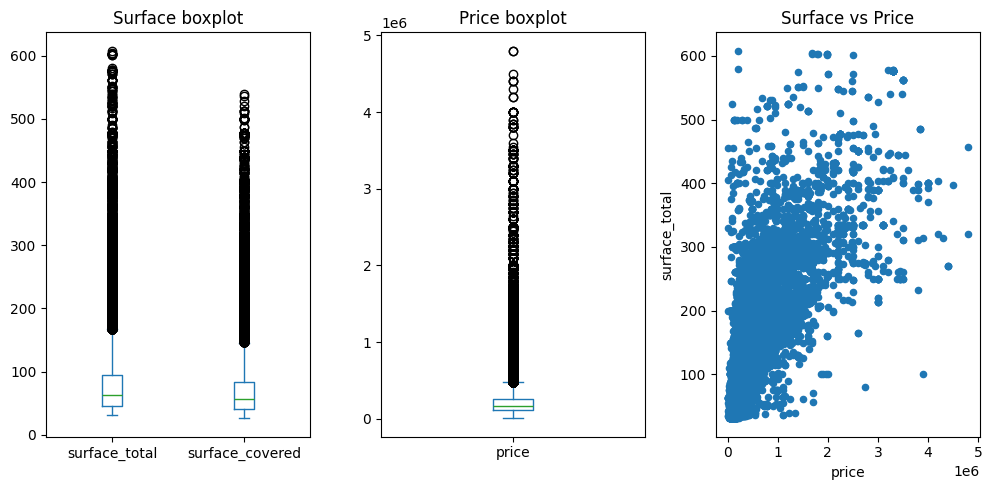

In [432]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))

df[["surface_total", "surface_covered"]].plot(kind="box", ax=ax1)
ax1.set_title("Surface boxplot")

df["price"].plot(kind="box", ax=ax2)
ax2.set_title("Price boxplot")

df.plot.scatter("price", "surface_total", ax=ax3)
ax3.set_title("Surface vs Price")

fig.tight_layout()
plt.show()


### This looks much more reasonable

Plus, we have filtered out most of properties with NaN values that we weren´t able to imput before.

In [433]:
nulos(df)

,Nan,Not NaN
lon,0,72305
lat,0,72305
country,0,72305
city,0,72305
neighborhood,17,72288
rooms,0,72305
bedrooms,0,72305
bathrooms,0,72305
surface_total,0,72305
surface_covered,0,72305


There are only 17 properties without the neighborhood. We can let them go

In [434]:
df=df[df["neighborhood"].notna()]

### Extra features

We are going to extract more information from the description columns to add as features.

 We are going to look for extra characteristics or amenities that could be related to the price

In [435]:
def extra_feat(df):
    df = df.copy()

    df.loc[:, "parking"] = df.description.str.contains(r"(?i)cochera|estacionamiento|garage", na=False).astype(int)
    df.loc[:, "amenities"] = df.description.str.contains(r"(?i)amenitie|amenity", na=False).astype(int)
    df.loc[:, "pool"] = df.description.str.contains(r"(?i)pileta|piscina|pisina|picina", na=False).astype(int)
    df.loc[:, "new"] = df.description.str.contains(r"(?i)estren|nuevo", na=False).astype(int)
    df.loc[:, "balcony"] = df.description.str.contains(r"(?i)balc|terr|patio|parque", na=False).astype(int)
    df.loc[:, "security"] = df.description.str.contains(r"(?i)seguridad|camara|cámara|vigilancia|guardia", na=False).astype(int)
    df.loc[:, "subway"] = df.description.str.contains(r"(?i)subte", na=False).astype(int)
    df.loc[:, "metrobus"] = df.description.str.contains(r"(?i)metrobus", na=False).astype(int)
    df.loc[:, "gym"] = df.description.str.contains(r"(?i)gym|gimnasio|gimnacio", na=False).astype(int)
    df.loc[:, "sum"] = df.description.str.contains(r"(?i)sum", na=False).astype(int)
    df.loc[:, "barbacue"] = df.description.str.contains(r"(?i)parrilla", na=False).astype(int)

    df.loc[:, "amenities_score"] = df[[
        "parking", "amenities", "pool", "new", "balcony", "security",
        "subway", "metrobus", "gym", "sum", "barbacue"
    ]].sum(axis=1)

    return df


In [436]:
df=extra_feat(df)

In [ ]:
df.head(3)

,lon,lat,country,city,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,title,description,property_type,operation_type,price,parking,amenities,pool,new,balcony,security,subway,metrobus,gym,sum,barbacue,amenities_score
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
556713,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,3,2.0,2,47,47,USD,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0,0,0,0,0,1,0,1,1,0,0,0,3
192912,-58.430493,-34.60662,Argentina,Capital Federal,Almagro,3,2.0,2,77,67,USD,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0,0,0,1,0,1,0,0,0,1,1,1,5
238224,-58.49176,-34.574123,Argentina,Capital Federal,Villa Urquiza,2,2.0,1,60,55,USD,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0,0,0,0,0,1,0,1,0,0,0,0,2


### Transforming string features

#### "Neighborhood" is a cathegorical feature, let´s transform it into numerical through one-hot-encoding

In [438]:
df = pd.get_dummies(df, columns=['neighborhood'], drop_first=True, dtype=int)

#### ML algorithms support only numerical columsn, so let´s select them

In [439]:
df.drop(["country", "city", "title", "description", "operation_type", "currency", "property_type"], axis=1, inplace=True)

### Correlation analysis
#### How does each feature correlates with price?

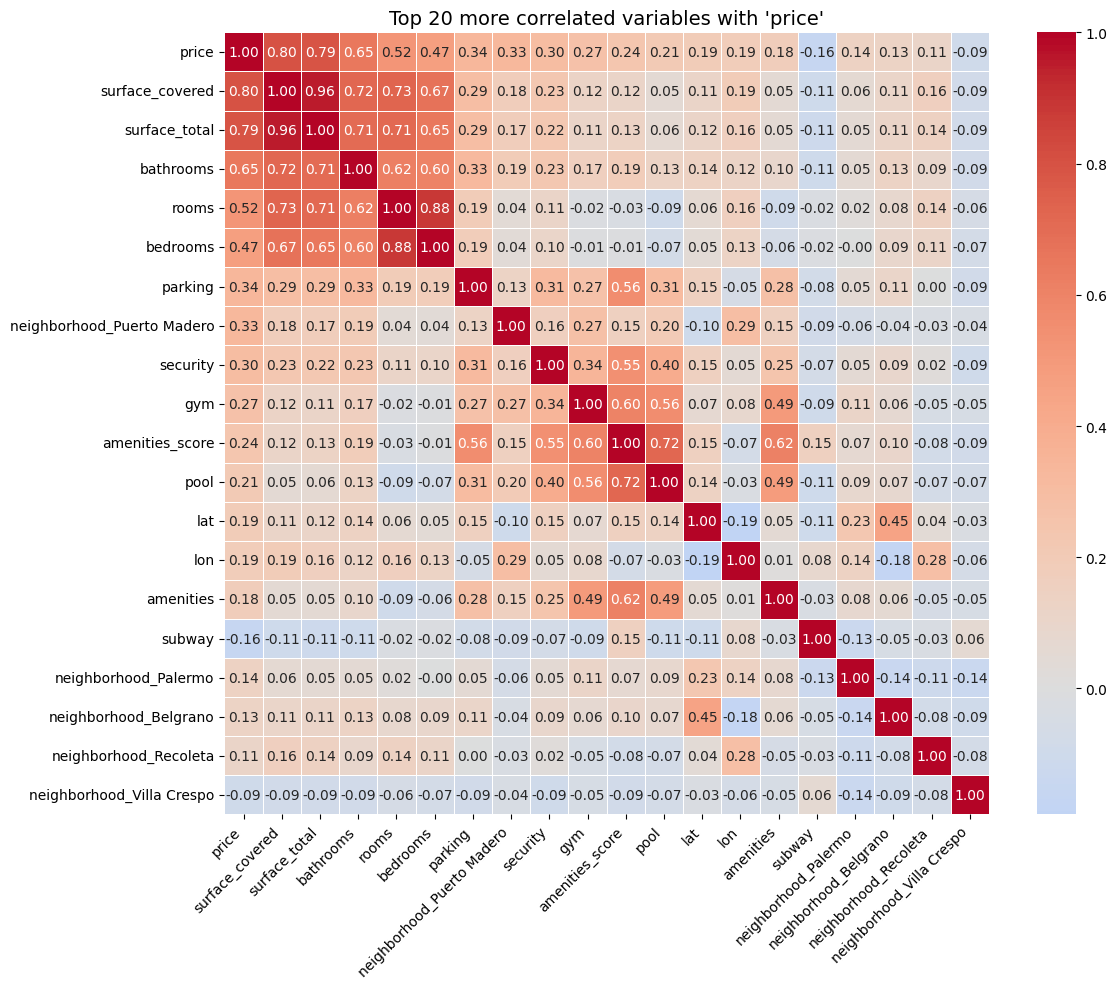

In [440]:
pd.set_option('display.max_rows', 20)
correlations=df.corr()["price"].sort_values(ascending=False, key=lambda x: np.abs(x))

# Seleccionar top 20 features más correlacionadas con 'price'
top_features = correlations.index[:20]

# Matriz de correlación para esas variables
corr_matrix = df[top_features].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Top 20 more correlated variables with 'price'", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### We can see that the original variables are the ones with highest correlation with price.

#### There are some new features that have an important correlation with price such as if the location of the property is in Puerto Madero, and having a gym, parking or security,as well.

#### For simplicity we are only going to keep the top_features

In [441]:
df_simple=df[top_features]

### Spliting the dataset: Train+Validation / Test

In [442]:
X = df_simple.copy().drop(columns=['price'])
y = df_simple['price']
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=6)


### First approach: Lineal Regression
#### Let´s train the simplest model 

Mean RMSE in Train: 150046
Mean RMSE in Validation: 150433
Mean R2 Train: 0.74
Mean R2 in Validation: 0.74


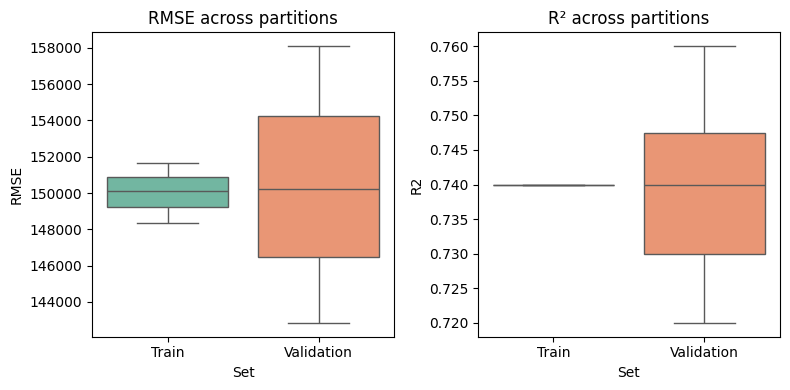

In [443]:
import warnings
warnings.filterwarnings("ignore")

#Initiate list where we are going to save the metrics
rmsq_linear_list = []
r2_linear_list = []
rmsq_train_linear_list = []
r2_train_linear_list = []

partitions = {}

#Differen seeds to evaluate different partitions of the dataset
random_states = [1,5,49,42,6,15,45,12,98,10]

for i in random_states:
    # Split between Train and Validation
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1764, random_state=i)

    # Save partitions for later
    partitions[i] = {
    "X_train": X_train.copy(),
    "y_train": y_train.copy(),
    "X_val": X_val.copy(),
    "y_val": y_val.copy(),
    }

    # Normalization of numerical columns
    cols_a_escalar = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']
    scaler = StandardScaler()
    
    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    
    X_train_scaled[cols_a_escalar] = scaler.fit_transform(X_train[cols_a_escalar])
    X_val_scaled[cols_a_escalar] = scaler.transform(X_val[cols_a_escalar])

    # Linear model training
    reg_linear = LinearRegression()
    reg_linear.fit(X_train_scaled, y_train)

    # Prediction on training set
    y_train_pred = reg_linear.predict(X_train_scaled)
    rmsq_train_linear_list.append(round(mean_squared_error(y_train, y_train_pred, squared=False), 0))
    r2_train_linear_list.append(round(r2_score(y_train, y_train_pred), 2))

    # Prediction on validation set
    y_val_pred = reg_linear.predict(X_val_scaled)
    rmsq_linear_list.append(round(mean_squared_error(y_val, y_val_pred, squared=False), 0))
    r2_linear_list.append(round(r2_score(y_val, y_val_pred), 2))

# Prepare data for visualization
df_resultados_melted = pd.DataFrame({
    "RMSE": rmsq_train_linear_list + rmsq_linear_list,
    "R2": r2_train_linear_list + r2_linear_list,
    "Set": ["Train"] * len(rmsq_train_linear_list) + ["Validation"] * len(rmsq_linear_list)
})

#Print Means MSE and R2
rmsq_train_linear_mean = np.mean(rmsq_train_linear_list).astype(int)
rmsq_linear_mean = np.mean(rmsq_linear_list).astype(int).astype(int)

r2_train_linear_mean = round(np.mean(r2_train_linear_list), 2)
r2_linear_mean = round(np.mean(r2_linear_list), 2)

print(f"Mean RMSE in Train: {rmsq_train_linear_mean}")
print(f"Mean RMSE in Validation: {rmsq_linear_mean}")

print(f"Mean R2 Train: {r2_train_linear_mean}")
print(f"Mean R2 in Validation: {r2_linear_mean}")

# Plotting MSE and R2 side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# MSE Plot
sns.boxplot(data=df_resultados_melted, x="Set", y="RMSE", ax=axes[0], palette="Set2")
axes[0].set_title("RMSE across partitions")

# R2 Plot
sns.boxplot(data=df_resultados_melted, x="Set", y="R2", ax=axes[1], palette="Set2")
axes[1].set_title("R² across partitions")

plt.tight_layout()
plt.show()

As expected we got worst (higher Roote Mean Squared Error and lower R2) and more scatter metrics for the validation dataset.

This implies that there is some overfitting. Apart for that, the model is predicting properties with an error of ~150k USD, which could be improved

How do the predictions look? 
Lets graph predictions vs actual value on 3 random partitions of the dataset

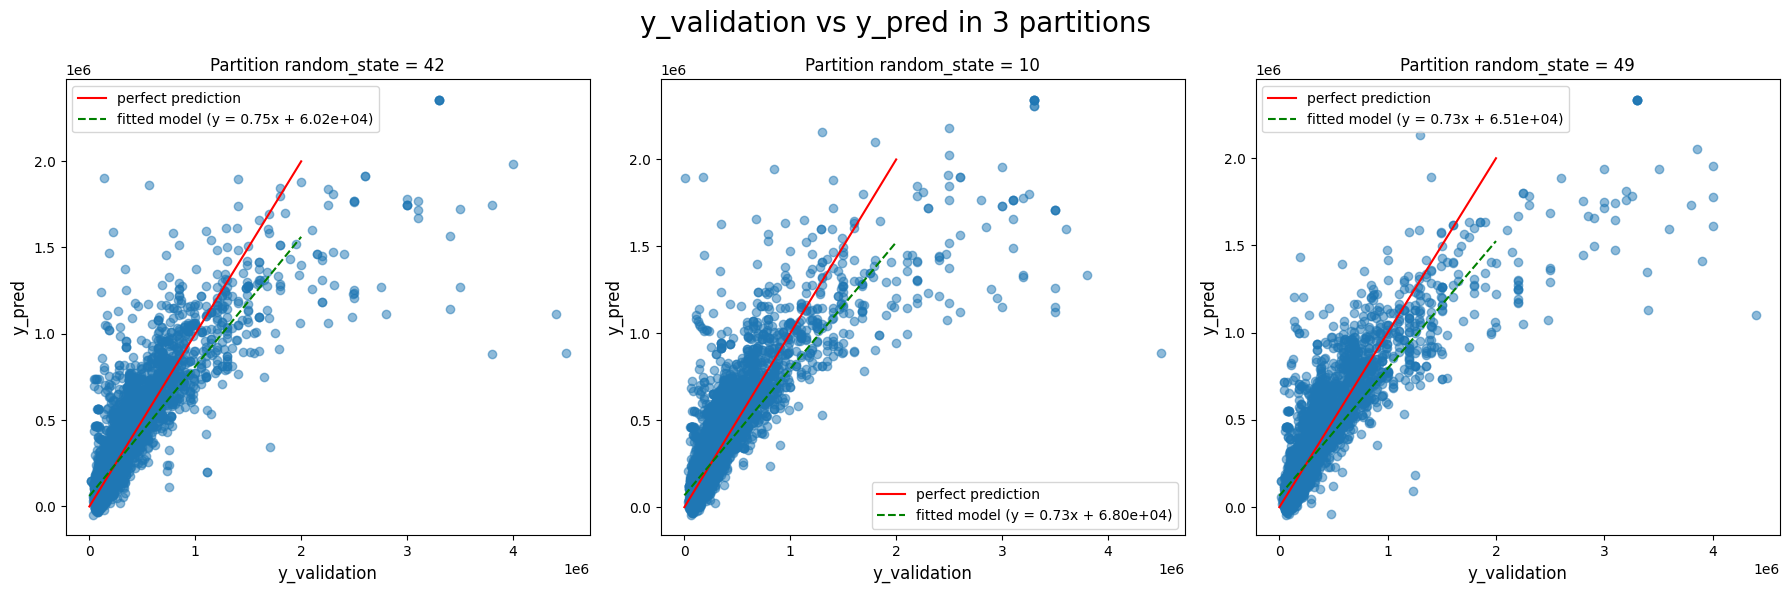

In [ ]:
warnings.filterwarnings("ignore")

# We choose 3 random parititions
random_states_muestra = random.sample(random_states, 3)

# Perfect prediction
x = np.arange(0, 2000000, 1000)
y = x

# Subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('y_validation vs y_pred in 3 partitions', fontsize=20)

for idx, rs in enumerate(random_states_muestra):
    datos = partitions[rs]

    # Normalización
    scaler = StandardScaler()
    cols_a_escalar = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']

    X_train_scaled = datos["X_train"].copy()
    X_val_scaled = datos["X_val"].copy()

    X_train_scaled[cols_a_escalar] = scaler.fit_transform(X_train_scaled[cols_a_escalar])
    X_val_scaled[cols_a_escalar] = scaler.transform(X_val_scaled[cols_a_escalar])

    # Model and prediction
    modelo_graf = LinearRegression()
    modelo_graf.fit(X_train_scaled, datos["y_train"])
    y_val_pred = modelo_graf.predict(X_val_scaled)

    # Graph
    axs[idx].scatter(datos["y_val"], y_val_pred, alpha=0.5)
    axs[idx].plot(x, y, color="red", label="perfect prediction")

    # Fitted regression line
    m, b = np.polyfit(datos["y_val"], y_val_pred, 1)
    axs[idx].plot(x, m*x + b, color="green", linestyle="--", label=f"fitted model (y = {m:.2f}x + {b:.2e})")

    axs[idx].set_title(f'Partition random_state = {rs}')
    axs[idx].set_xlabel('y_validation', fontsize=12)
    axs[idx].set_ylabel('y_pred', fontsize=12)
    axs[idx].legend()

plt.tight_layout()
plt.show()

We can see that overall there is a good prediction, but most properties with a high price are incorrectly predicted with a lower price

#### Which are the more important features for the model?
#### Do these features change between partitions?

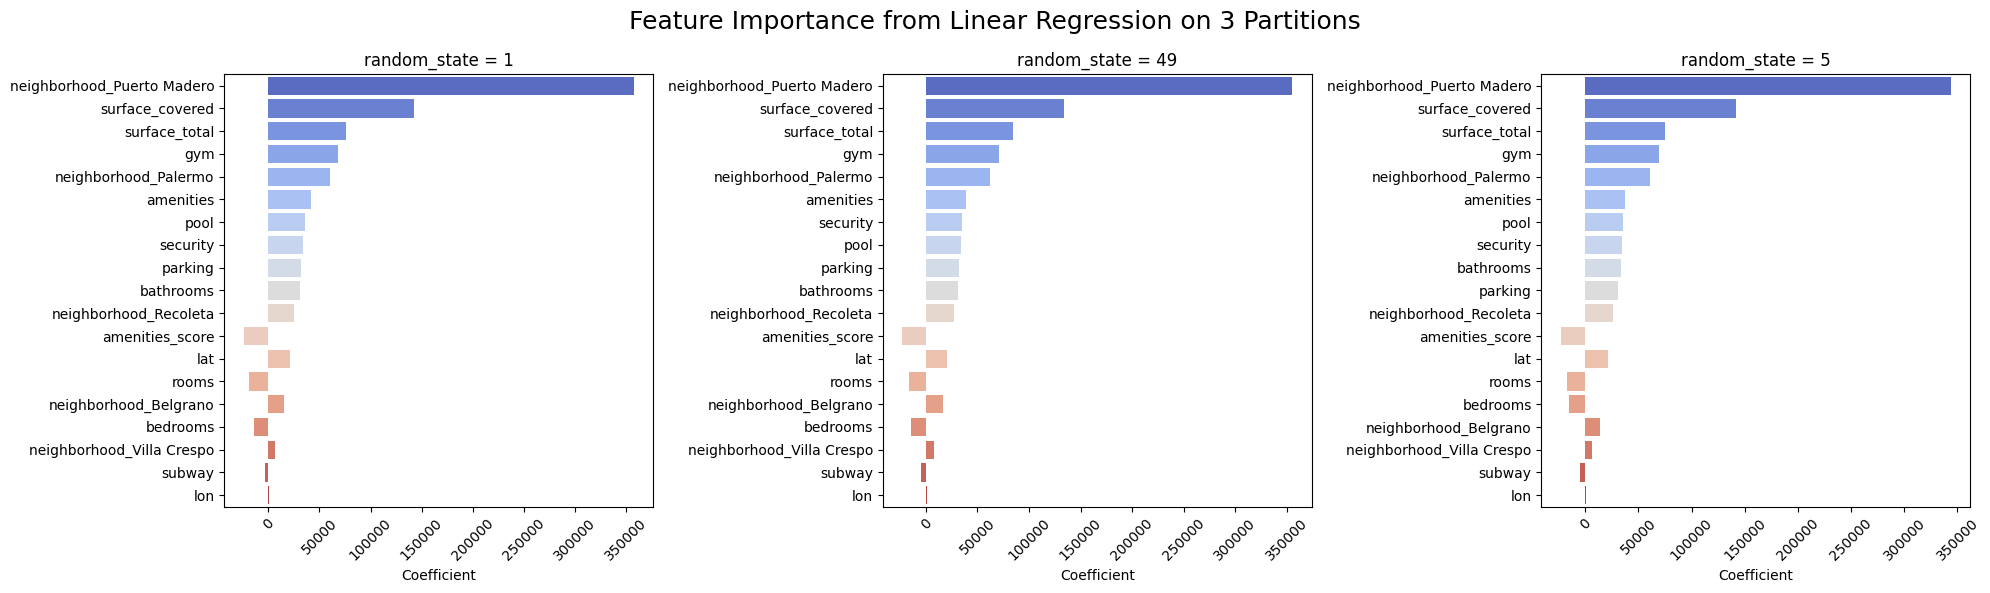

In [319]:
# Choose 3 random partitions
random_states_sample = random.sample(random_states, 3)

# Columns to scale
cols_to_scale = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Feature Importance from Linear Regression on 3 Partitions", fontsize=18)

for idx, rs in enumerate(random_states_sample):
    data = partitions[rs]

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = data["X_train"].copy()
    X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_scaled[cols_to_scale])

    # Linear regression model
    reg = LinearRegression()
    reg.fit(X_train_scaled, data["y_train"])

    # Coefficients
    coef_df = pd.DataFrame({
        "feature": X_train_scaled.columns,
        "coeficients": reg.coef_
    })
    coef_df["abs_coef"] = coef_df["coeficients"].abs()
    coef_df_sorted = coef_df.sort_values(by="abs_coef", ascending=False)

    # Plot
    sns.barplot(
        data=coef_df_sorted,
        x="coeficients",
        y="feature",
        palette="coolwarm",
        ax=axes[idx]
    )
    axes[idx].set_title(f"random_state = {rs}")
    axes[idx].set_xlabel("Coefficient")
    axes[idx].set_ylabel("")

    # Rotate x-axis tick labels
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

For the 3 partitions evaluated the most important features are the ubication on Puerto Madero neighborhood, the surface and the presence of some amenities.
The fact that the order is similar tells us that the model is robust

### Random forest regression

In [313]:
#For this models we are going to keep all the original features.
#Lets start with the same paritition as before

X = df.drop(columns=['price'])
y = df['price']
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=6)


Mean RMSE in Train: 30536
Mean RMSE in Validation: 83551
Mean R2 Train: 0.99
Mean R2 in Validation: 0.92


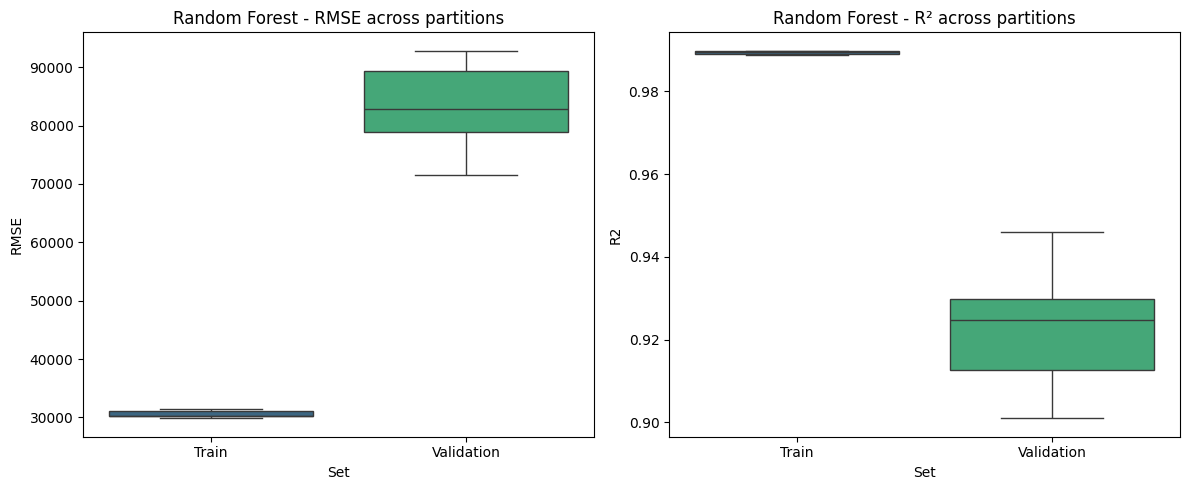

In [327]:
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor

# Lists to store metrics
rmsq_rf_list = []
r2_rf_list = []
rmsq_train_rf_list = []
r2_train_rf_list = []

# Same partitions as before
random_states = [1, 5, 49, 42, 6, 15, 45, 12, 98, 10]

for i in random_states:
    # Data split

    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1764, random_state=i)

    # Normalization
    cols_a_escalar = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']
    scaler = StandardScaler()

    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()

    X_train_scaled[cols_a_escalar] = scaler.fit_transform(X_train[cols_a_escalar])
    X_val_scaled[cols_a_escalar] = scaler.transform(X_val[cols_a_escalar])

    # Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=i, n_jobs=-1)
    rf.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = rf.predict(X_train_scaled)
    y_val_pred = rf.predict(X_val_scaled)

    # Metrics
    rmsq_train_rf_list.append(mean_squared_error(y_train, y_train_pred, squared=False))
    rmsq_rf_list.append(mean_squared_error(y_val, y_val_pred, squared=False))
    r2_train_rf_list.append(r2_score(y_train, y_train_pred))
    r2_rf_list.append(r2_score(y_val, y_val_pred))

#Print Means MSE and R2
msq_train_rf_mean = np.mean(rmsq_train_rf_list).astype(int)
msq_rf_mean = np.mean(rmsq_rf_list).astype(int).astype(int)
r2_train_rf_mean = np.mean(r2_train_rf_list)
r2_rf_mean = np.mean(r2_rf_list)

print(f"Mean RMSE in Train: {msq_train_rf_mean}")
print(f"Mean RMSE in Validation: {msq_rf_mean}")
print(f"Mean R2 Train: {r2_train_rf_mean:.2f}")
print(f"Mean R2 in Validation: {r2_rf_mean:.2f}")


# Create long-format DataFrame for boxplots
df_rf_melted = pd.DataFrame({
    "RMSE": rmsq_train_rf_list + rmsq_rf_list,
    "R2": r2_train_rf_list + r2_rf_list,
    "Set": ["Train"] * len(rmsq_train_rf_list) + ["Validation"] * len(rmsq_rf_list)
})

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df_rf_melted, x="Set", y="RMSE", ax=axes[0], palette="viridis")
axes[0].set_title("Random Forest - RMSE across partitions")

sns.boxplot(data=df_rf_melted, x="Set", y="R2", ax=axes[1], palette="viridis")
axes[1].set_title("Random Forest - R² across partitions")

plt.tight_layout()
plt.show()


#### There is a clear improvment in both metrics compared to the linear model. However there is more overfitting. This is because the default parametrs of the random forest do not control the growing of the tree, making the algorithm to "memorize" must properties in train (the R2 is almost 1) which leaves little capacity to generalize, aka is overfitting.

#### We can control this by tweaking the hyperparameters...and we are going to do it later with Bayesian Optimization

##### How is the feature importance for this model?

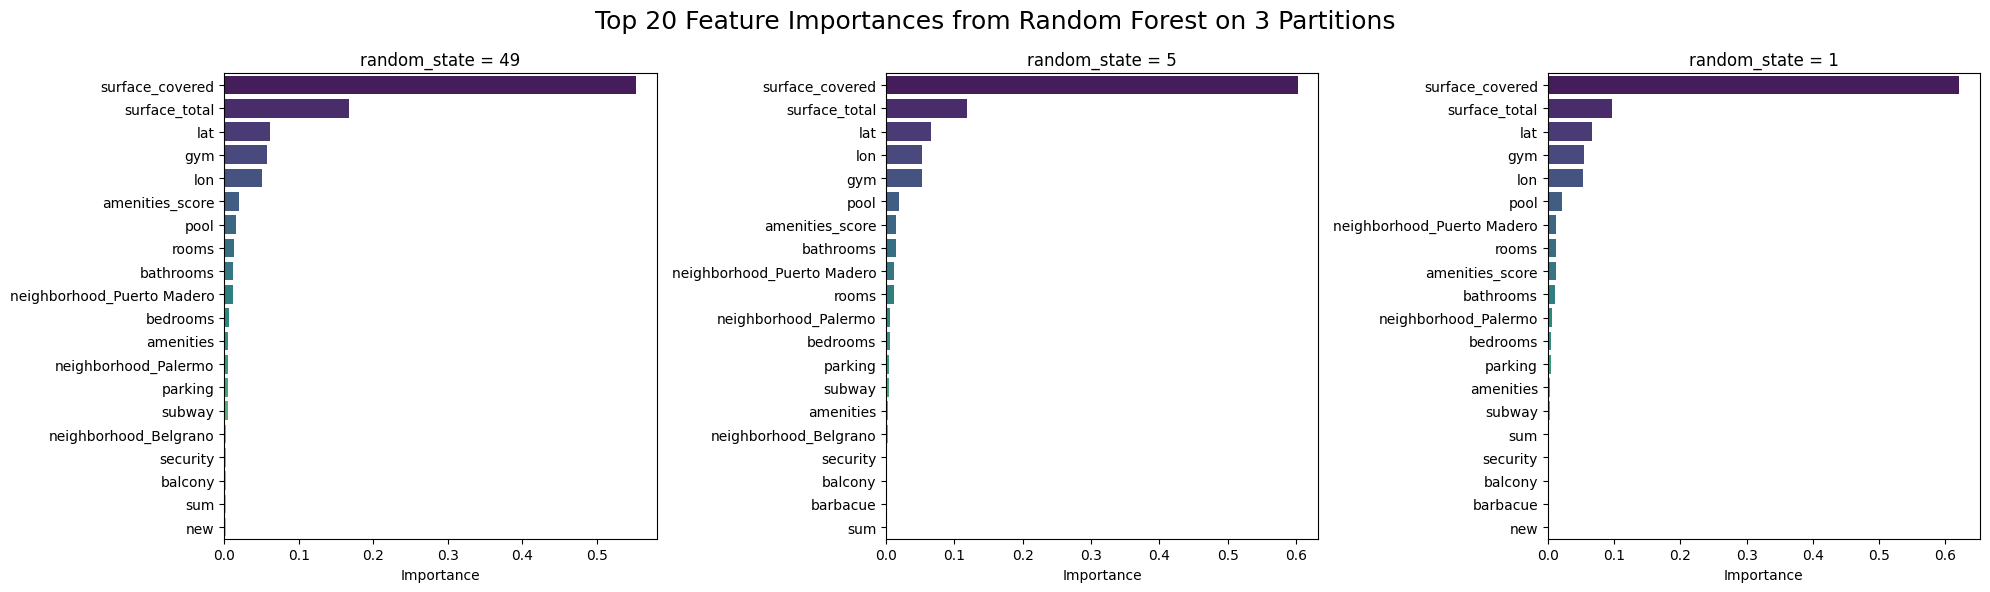

In [ ]:
warnings.filterwarnings("ignore")

# Choose 3 random partitions
random_states_sample = random.sample(random_states, 3)

# Columns to scale
cols_to_scale = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Top 20 Feature Importances from Random Forest on 3 Partitions", fontsize=18)

for idx, rs in enumerate(random_states_sample):
    # Data split
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1764, random_state=rs)

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

    # Random Forest model
    rf_features = RandomForestRegressor(n_estimators=100, random_state=rs, n_jobs=-1)
    rf_features.fit(X_train_scaled, y_train)

    # Feature importances
    importances = pd.DataFrame({
        "feature": X_train_scaled.columns,
        "importance": rf_features.feature_importances_
    }).sort_values(by="importance", ascending=False).head(20)

    # Plot
    sns.barplot(
        data=importances,
        x="importance",
        y="feature",
        palette="viridis",
        ax=axes[idx]
    )
    axes[idx].set_title(f"random_state = {rs}")
    axes[idx].set_xlabel("Importance")
    axes[idx].set_ylabel("")

plt.tight_layout()
plt.show()


#### For this algorithm the most important features appear to be the surfaces

#### How do the predictions look?

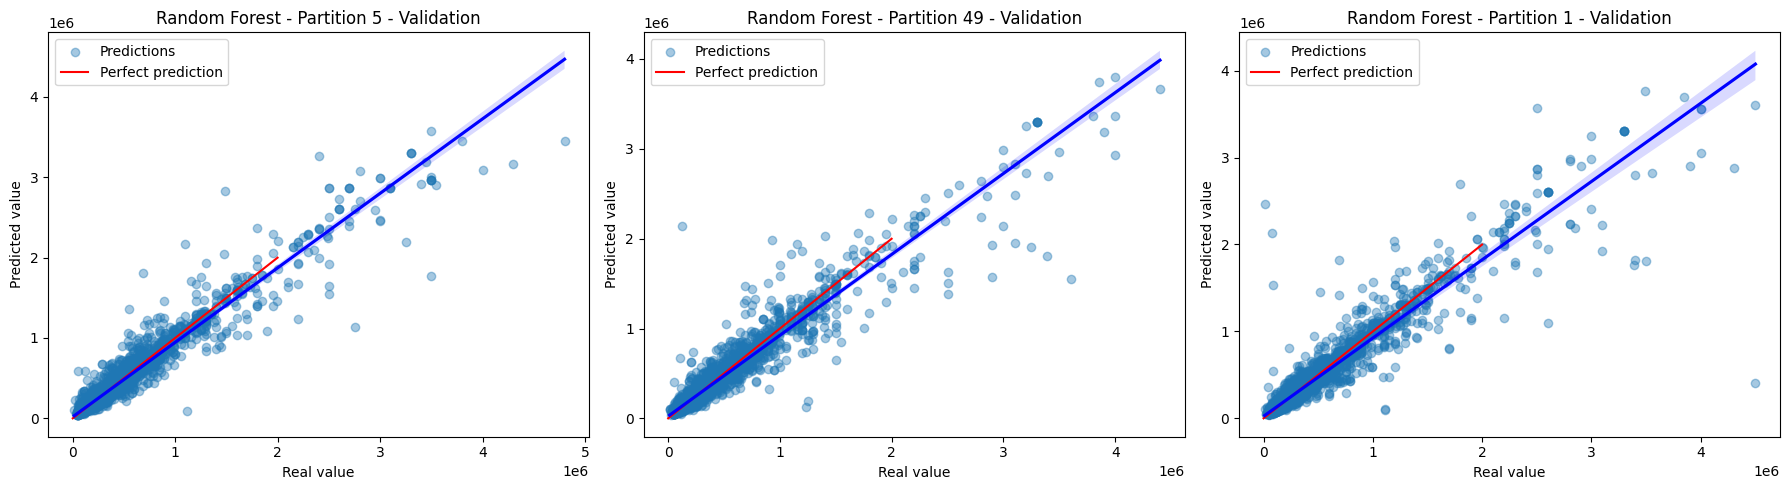

In [ ]:
warnings.filterwarnings("ignore")

# Select 3 random partitions
random_states_sample = random.sample(random_states, 3)

# Features to scale
cols_to_scale = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']

# Plotting setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
x = np.arange(0, 2000000, 1000)
y = x

for idx, rs in enumerate(random_states_sample):
    # Data split
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1764, random_state=rs)

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

    X_val_scaled = X_val.copy()
    X_val_scaled[cols_to_scale] = scaler.transform(X_val[cols_to_scale])

    # Train Random Forest Regressor
    rf_graph = RandomForestRegressor(random_state=rs)
    rf_graph.fit(X_train_scaled, y_train)

    # Predict
    y_val_pred = rf_graph.predict(X_val_scaled)

    # Scatter plot of predictions vs. actual
    axes[idx].scatter(y_val, y_val_pred, alpha=0.4, label="Predictions")
    axes[idx].plot(x, y, color="red", label="Perfect prediction")

    # Plot regression line
    sns.regplot(x=y_val, y=y_val_pred, scatter=False, ax=axes[idx], color="blue", line_kws={"label": "Regression line"})

    # Formatting
    axes[idx].set_title(f"Random Forest - Partition {rs} - Validation")
    axes[idx].set_xlabel("Real value")
    axes[idx].set_ylabel("Predicted value")
    axes[idx].legend()

plt.tight_layout()
plt.show()


The predictions are way more accurated compared to the linear model

Could we improve the model with bayesian optimization of hyperparameters? Just for a test we are going to see it in only one partition

In [323]:
X = df.drop(columns=['price'])
y = df['price']
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=6)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1764, random_state=1)

# Normalization
cols_a_escalar = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

X_train_scaled[cols_a_escalar] = scaler.fit_transform(X_train[cols_a_escalar])
X_val_scaled[cols_a_escalar] = scaler.transform(X_val[cols_a_escalar])


import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split

# Defining the objective function for Bayesian optimization
def objective(trial):
    # Hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Defining the model with the suggested hyperparameters
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  max_features=max_features,
                                  bootstrap=bootstrap,
                                  random_state=42)

    # Use cross_val_score to get MSE, then compute RMSE
    neg_mse_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-neg_mse_scores) ** 0.5
    mean_rmse = rmse_scores.mean()

    return mean_rmse  # Optuna will minimize RMSE

# Create the Optuna study and optimize
study = optuna.create_study(direction='minimize')  # We want to minimize MSE, hence maximizing negative MSE
study.optimize(objective, n_trials=100)  # Perform 100 trials

# Get the best hyperparameters
best_params = study.best_params

# Print the best hyperparameters
print(f"Best hyperparameters found by Optuna: {best_params}")

# Instantiate the model with the best hyperparameters
best_rf = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'],
                                max_features=best_params['max_features'],
                                bootstrap=best_params['bootstrap'],
                                random_state=42)

# Train the model with the best hyperparameters
best_rf.fit(X_train_scaled, y_train)

# Evaluate the model with the best hyperparameters on the validation set
y_pred_val = best_rf.predict(X_val_scaled)

# Calculate metrics
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
r2_val = r2_score(y_val, y_pred_val)

print("RMSE of the optimized Random Forest model: {:.2f}".format(rmse_val))
print("Validation R²: {:.4f}".format(r2_val))

[I 2025-04-15 16:36:52,715] A new study created in memory with name: no-name-ef785db1-5a3c-427f-a40d-ba9072e0925c
[I 2025-04-15 16:37:00,395] Trial 0 finished with value: 153714.89025332849 and parameters: {'n_estimators': 104, 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 153714.89025332849.
[I 2025-04-15 16:37:08,383] Trial 1 finished with value: 175122.3695384147 and parameters: {'n_estimators': 161, 'max_depth': 3, 'min_samples_split': 35, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 153714.89025332849.
[I 2025-04-15 16:37:15,846] Trial 2 finished with value: 114484.11831640352 and parameters: {'n_estimators': 47, 'max_depth': 11, 'min_samples_split': 19, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 114484.11831640352.
[I 2025-04-15 16:37:22,083] Trial 3 finished with value: 114222.2685571167

Best hyperparameters found by Optuna: {'n_estimators': 197, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}
RMSE of the optimized Random Forest model: 92150.14
Validation R²: 0.9128


Best hyperparameters found by Optuna: {'n_estimators': 197, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}
RMSE of the optimized Random Forest model: 92150.14
Validation R²: 0.9128

Despite the time of operation, It doesn´t show a big improvement in terms of RMSE. Altough we have to remember that this was done in only one partition of the dataset

### Comparation of models on Test dataset

In [329]:
X = df_simple.copy().drop(columns=['price'])
y = df_simple['price']
X_trainval_simple, X_test_simple, y_trainval_simple, y_test_simple = train_test_split(X, y, test_size=0.15, random_state=6)

# Normalization of numerical columns
cols_a_escalar = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']
scaler = StandardScaler()

X_trainval_simple_scaled = X_trainval_simple.copy()
X_test_simple_scaled = X_test_simple.copy()

X_trainval_simple_scaled[cols_a_escalar] = scaler.fit_transform(X_trainval_simple[cols_a_escalar])
X_test_simple_scaled[cols_a_escalar] = scaler.transform(X_test_simple[cols_a_escalar])


#### Linear regression

In [352]:
# Evaluation of Linear Regression on test
y_pred_test_lr = reg_linear.predict(X_test_simple_scaled)

# Calculate metrics
rmse_test_lr= int(mean_squared_error(y_test, y_pred_test_lr, squared=False))
r2_test_lr = round(r2_score(y_test, y_pred_test_lr), 2)

print("RMSE of the optimized Random Forest model: {:.0f}".format(rmse_test_lr))
print("Test R²: {:.2f}".format(r2_test_lr))

#-------------------------------------------------------------------------------------------------------



RMSE of the optimized Random Forest model: 165095
Test R²: 0.71


#### Random Forest (default and optimized)

In [353]:
#Normalization of test 
cols_a_escalar = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']
scaler = StandardScaler()

X_trainval_scaled = X_trainval.copy()
X_test_scaled = X_test.copy()

X_trainval_scaled[cols_a_escalar] = scaler.fit_transform(X_trainval[cols_a_escalar])
X_test_scaled[cols_a_escalar] = scaler.transform(X_test[cols_a_escalar])


In [ ]:
# Evaluation of Random Forest on test
y_pred_test_rf = rf.predict(X_test_scaled)
 
# Calculate metrics
rmse_test_rf= int(mean_squared_error(y_test, y_pred_test_rf, squared=False))
r2_test_rf = round(r2_score(y_test, y_pred_test_rf), 2)

print("RMSE of the Random Forest model: {:.0f}".format(rmse_test_rf))
print("Test R²: {:.2f}".format(r2_test_rf))

#-------------------------------------------------------------------------------------------------------

# Evaluation of Random Forest with Bayesian Optimization on test
y_pred_test_rf_bo = best_rf.predict(X_test_scaled)

# Calculate metrics
rmse_test_rf_bo= int(mean_squared_error(y_test, y_pred_test_rf_bo, squared=False))
r2_test_rf_bo = round(r2_score(y_test, y_pred_test_rf_bo),2)

print("RMSE of the optimized Random Forest model: {:.0f}".format(rmse_test_rf_bo))
print("Test R²: {:.2f}".format(r2_test_rf_bo))

RMSE of the Random Forest model: 100463
Test R²: 0.89
RMSE of the optimized Random Forest model: 99971
Test R²: 0.89


In [367]:
results=pd.DataFrame ({
    "Linear Regression": [rmse_test_lr, r2_test_lr],
    "Random Forest": [rmse_test_rf, r2_test_rf],
    "Optimized Random Forest": [rmse_test_rf_bo, r2_test_rf_bo]
}, index=["RMSE", "R2"])

results


,Linear Regression,Random Forest,Optimized Random Forest
RMSE,165095.00,100463.00,99971.00
R2,0.71,0.89,0.89


All models had worst performance on unseen data (the Test dataset), which is expectable and tell us that there´s still some overfitting on the training 

As expected, Random Forest had a much better performance than Linear Regression.

The bayesian optimization of hyperparameters improved the model only modestly, probably due to the simplicity and cleanliness of the dataset.

Bayesian optimization is computationaly expensive and time-consuming, hence the importance of making a thorough cleaning of the data...which can actually save you time! 